# Problem 1: Graph Analysis [40 points]

When exploring a large graph (or any large dataset), it is a good idea to do some preliminary/exploratory data analysis to get a sense of how the data "looks like".

In the first part of the assignment you will
<ul>
<li>Create a graph adjacency matrix from (source, destination) edge pairs.</li>
<li> Implement the Pagerank and Personalized Pagerank algorithms. </li>
<li> Study centrality distributions of nodes in the graph.</li>
<li> Compare and contrast different centrality measures.</li>
</ul>

Follow the instructions and consecutive steps in the assignment. You are reqired to <b>answer the numbered questions in bold face</b>. However, you need to follow the instructions sequentially.

<b>Disclaimer:</b> The instructions below are geared towards Python users, but you are free to adapt them to your specific environment (e.g. Matlab, R, etc.).




### Set up

We strongly recommend that you work with Python for the assignment, as we provide partial code for Python users. 

If you have a lot of programming experience, on the other hand, you should be able to adapt the provided code and follow the instructions in any other programming language you are familiar with.

To download and install Python, go to <a href="https://www.anaconda.com/download/">Anaconda web site</a> and install Python and Jupyter notebook.

Once the installation is complete, open your terminal and type 

jupyter notebook

which should start the Jupyter server. Load the HW iPython files (with extension .ipynb) and follow the instructions.

### Download data files

Download the edge file called `graph.txt` from Canvas. The file contains the (source, destimation) pairs for each <b>directed</b> edge in the graph, i.e. first column in `graph.txt` refers to the source node, and the second column refers to the destination node.

It is a small randomly generated graph with n=100 nodes and m=1024 edges. There are no dead ends in the graph, that is, each edge has at least 1 outgoing edge.

There may be <b>multiple edges between a pair of nodes</b>, your program should consider these as <b>edge weight</b> instead of ignoring them.


## 1.1 Degree Distributions

Start by creating the adjacency matrix from the input file. Given the adjacency matrix: 

> <b>1) [5 points] Compute the in-degree and out-degree  (assuming edges are unweighted), as well as the weighted in-degree (or in-weight) and out-weight of the nodes in the graph. Plot the probability mass function of these quantities.</b> 

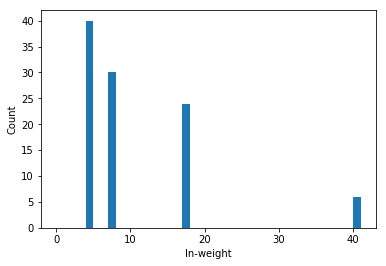

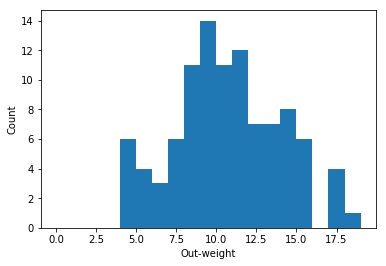

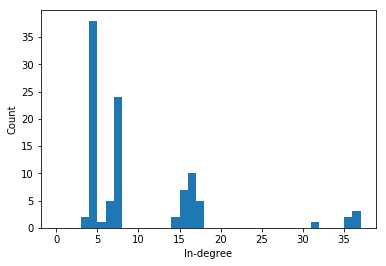

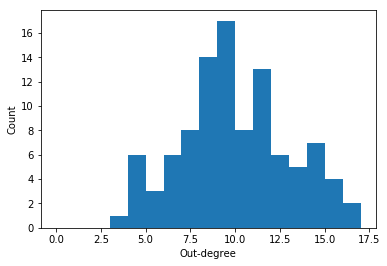

In [101]:
import numpy as np                       # dense matrices
import matplotlib.pyplot as plt          # plotting

import numpy as np                       # dense matrices
import matplotlib.pyplot as plt          # plotting

filename = "graph.txt"
# YOUR CODE HERE

f= open(filename,"r")

lines = []
for line in f:
    a = line.split()
    lines.append(a)
    
size = len(lines)

ad_mat1 = np.zeros((100,100))
ad_mat2 = np.zeros((100,100))

for i in range(0,size):
    source = np.int(lines[i][0]) - 1
    dest = np.int(lines[i][1]) - 1
    
    
    ad_mat1[dest][source] += 1
    ad_mat2[dest][source] = 1
    

in_wt = np.sum(ad_mat1,axis=1).astype(int)
out_wt = np.sum(ad_mat1,axis=0).astype(int)

in_degree = np.sum(ad_mat2,axis=1).astype(int)
out_degree = np.sum(ad_mat2,axis=0).astype(int)

# inweight histogram
plt.hist(in_wt, bins = range(0,np.amax(in_wt) + 1,1))
plt.xlabel('In-weight');plt.ylabel('Count');
plt.show()

# outweight histogram
plt.hist(out_wt, bins = range(0,np.amax(out_wt) + 1,1))
plt.xlabel('Out-weight');plt.ylabel('Count');
plt.show()

# indegree histogram
plt.hist(in_degree, bins = range(0,np.amax(in_degree) + 1,1))
plt.xlabel('In-degree');plt.ylabel('Count');
plt.show()

# outdegree histogram
plt.hist(out_degree, bins = range(0,np.amax(out_degree) + 1,1))
plt.xlabel('Out-degree');plt.ylabel('Count');
plt.show()




## 1.2 Implementing Pagerank

> <b>2) [10 points] Implement the Pagerank algorithm discussed in class. Start by creating the adjacency matrix from the input file and then construct the <u>column-normalized</u> $M$ matrix. Use the iterative power method in your implementation, with teleport probability $1-\beta = 0.2$. Run the aforementioned iterative process for 40 iterations and obtain the PageRank vector $r$. </b> 

In [37]:
# YOUR CODE HERE

# column normalize M matrix
M = ad_mat1/out_degree

# initialize r0 and set beta
#teleport is the initialization combined with all ones square matrix
teleport = np.ones(M.shape)/100

pgrank = (np.ones(100)/100).reshape(100,1)
beta = 0.8
#google matrix A
A = beta* M + (1 - beta)* teleport

#Power iteration method
for l in range(0,40):
    pgrank = np.matmul(A,pgrank)

print pgrank




[[ 0.43920302]
 [ 0.07031788]
 [ 0.09230536]
 [ 0.08595418]
 [ 0.1793472 ]
 [ 0.07117739]
 [ 0.04779169]
 [ 0.10479029]
 [ 0.16416727]
 [ 0.09131886]
 [ 0.05909172]
 [ 0.06070012]
 [ 0.20744936]
 [ 0.46693706]
 [ 0.07699813]
 [ 0.06579816]
 [ 0.07062402]
 [ 0.16272157]
 [ 0.06398677]
 [ 0.0558754 ]
 [ 0.07308273]
 [ 0.17508834]
 [ 0.05802422]
 [ 0.08278084]
 [ 0.08287953]
 [ 0.17240517]
 [ 0.40960602]
 [ 0.07606205]
 [ 0.08306088]
 [ 0.07833105]
 [ 0.14738481]
 [ 0.0559432 ]
 [ 0.05950464]
 [ 0.07032522]
 [ 0.14544916]
 [ 0.06122186]
 [ 0.04281332]
 [ 0.08281004]
 [ 0.150529  ]
 [ 0.42102353]
 [ 0.09237179]
 [ 0.13086208]
 [ 0.07689476]
 [ 0.14877507]
 [ 0.05021494]
 [ 0.05895404]
 [ 0.0703735 ]
 [ 0.32007346]
 [ 0.06372256]
 [ 0.04976034]
 [ 0.0942059 ]
 [ 0.16086449]
 [ 0.48299646]
 [ 0.14000797]
 [ 0.11548654]
 [ 0.09623251]
 [ 0.21097363]
 [ 0.05770748]
 [ 0.04067392]
 [ 0.10458665]
 [ 0.22475441]
 [ 0.08579523]
 [ 0.04905756]
 [ 0.08633661]
 [ 0.22075009]
 [ 0.36263102]
 [ 0.12691

> <b> 3) [2 points] Compute the following: 
<ul>
<li>List the top 5 node ids along with their highest PageRank scores.</li>
<li>List the bottom 5 node ids along with their lowest PageRank scores.</li>
</ul>
</b> 

In [80]:
# YOUR CODE HERE

#Flattening for argsort operations
pgrank1 = pgrank.flatten()

print ("Top 5 node ID's(range from 1 to 100) with highest PageRank scores\n")
top5_nids = pgrank1.argsort()[-5:][::-1]
for i in range(0,5):
    p1 = top5_nids[i]
    print ("Node ID: " + str(p1+1) + "    Pagerank score:" + str(pgrank[p1]))

print ("\nBottom 5 node ID's(range from 1 to 100) with lowest PageRank scores\n")
bot5_nids = pgrank1.argsort()
for i in range(0,5):
    p2 = bot5_nids[i]
    print ("Node ID: " + str(p2+1) + "    Pagerank score:" + str(pgrank[p2]))




Top 5 node ID's(range from 1 to 100) with highest PageRank scores

Node ID: 53    Pagerank score:[ 0.48299646]
Node ID: 14    Pagerank score:[ 0.46693706]
Node ID: 1    Pagerank score:[ 0.43920302]
Node ID: 40    Pagerank score:[ 0.42102353]
Node ID: 27    Pagerank score:[ 0.40960602]

Bottom 5 node ID's(range from 1 to 100) with lowest PageRank scores

Node ID: 85    Pagerank score:[ 0.03797254]
Node ID: 59    Pagerank score:[ 0.04067392]
Node ID: 81    Pagerank score:[ 0.04143266]
Node ID: 37    Pagerank score:[ 0.04281332]
Node ID: 89    Pagerank score:[ 0.0443183]


## 1.3 Node Centralities

Importance of nodes in a graph can be measured in various ways. Such measures are called centrality measures. Pagerank score is one such measure. In-degree of a node is also indicative of their importance, and can be treated as an authority score.

> <b>4) [3 points] Plot the weighted in-degree vs. Pagerank score of the nodes in a scatter plot. What is your observation? Briefly state.</b>

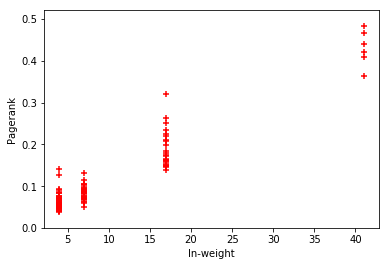

In [90]:
# YOUR CODE HERE

plt.scatter(in_wt,pgrank,c="r",marker='+')
plt.xlabel('In-weight');plt.ylabel('Pagerank');
plt.show()

><b> Observation</b>

>We observe that the higher the in-weight, the higher is the pagerank. 

>The nodes having higher weighted in-degree are considered as more important and are hence alloted a higher pagerank.
This means that such nodes are pointed to by many smaller nodes or (one or more) important node.

>In contrast to this, the nodes which have lower weighted in-degree are considered less important and hence are alloted a lower pagerank. Such nodes are pointed by a very smaller number of nodes or (one or more) unimportant nodes, making them less important during web page search. 

In this part, you will use a graph processing library called `NetworkX`. Different programming platforms provide special libraries for network analysis and graph processing, including functionality for computing various centrality measures on nodes. 

We start by importing the library.

In [92]:
import networkx as nx


To answer the questions in this part, refer to the documentation for NetworkX here: <a href="https://networkx.github.io/documentation/latest/_downloads/networkx_reference.pdf">https://networkx.github.io/documentation/latest/_downloads/networkx_reference.pdf</a>

> <b>5) Follow the instructions below.
<ul>
<li>[1 point] Create a directed multigraph called $G$ from the edgelist.</li>
<li>[2 points] Use built-in functions in `NetworkX` to compute the weighted in-degree and Pagerank centralities. (Note that the `pagerank` function is not defined for multi-graphs. Instead, you will find the `pagerank_numpy` implementation useful, which works with Multi(Di)Graphs.)</li>
<li>[2 points] Plot the weighted in-degree centrality vs. Pagerank centrality of the nodes in a scatter plot. This plot should look similar to what you had in step 4) above.</li>
</ul>
</b>


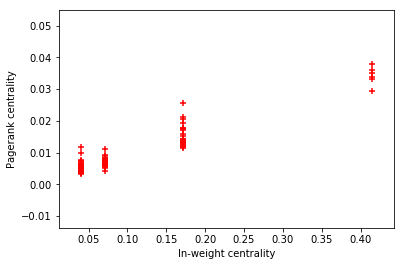

In [209]:
# YOUR CODE HERE

G = nx.MultiDiGraph()

f1= open(filename,"r")

lines1 = []
for line1 in f1:
    a11 = line1.split()
    a12 = tuple(a11)
    lines1.append(a12)
    
G.add_edges_from(lines1)

#Computing in-degree centrality
in_deg_cent = nx.algorithms.centrality.in_degree_centrality(G)

#Computing pagerank 
pr = nx.pagerank_numpy(G, alpha=0.8)

#Converting dictionaries into lists
list_idc = [ v for v in in_deg_cent.values() ]
list_pr = [ v for v in pr.values() ]

#Converting lists into arrays
ar_idc = np.array(list_idc)
ar_pr = np.array(list_pr)

plt.scatter(ar_idc,ar_pr,c="r",marker='+')
plt.xlabel('In-weight centrality');plt.ylabel('Pagerank centrality');
plt.show()


>Yes, the graph above looks the same as in step 4) above.

`NetworkX` provides other built-in centrality measures, such as betweenness and closeness centrality. Betweenness centrality of a node $i$ is proportional to the number of shortest paths between all pairs of nodes in the graph that pass through $i$. That is, $i$ resides on many shortest paths.

> <b>6) [3 points] Use the built-in function in `NetworkX` to compute the betweenness centrality of the nodes in $G$. Next, plot the Pagerank centrality vs. betweenness centrality of the nodes in a scatter plot. </b>

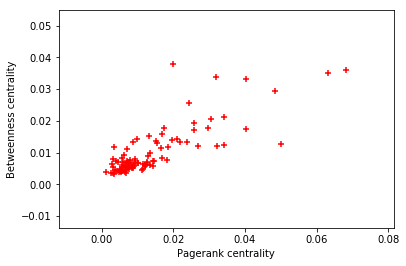

In [184]:
# YOUR CODE HERE

bwn_cen = nx.betweenness_centrality(G)
list_bwnc = [ v for v in bwn_cen.values() ]
ar_bwnc = np.array(list_bwnc)

plt.scatter(ar_bwnc,ar_pr,c="r",marker='+')
plt.xlabel('Pagerank centrality');plt.ylabel('Betweenness centrality');
plt.show()


> <b>7) [2 points] What do you observe? How do you compare this plot to the one you obtained in step 6)? How would you explain the difference? State briefly.</b>

><b> Analysis and Observation</b>

>(Reference from Wikipedia)Degree centrality is defined as the number of links incident upon a node (i.e., the number of ties that a node has). The degree can be interpreted in terms of the immediate risk of a node for catching whatever is flowing through the network (such as a virus, or some information). In the case of a directed network (where ties have direction), we usually define two separate measures of degree centrality, namely indegree and outdegree. Accordingly, indegree is a count of the number of ties directed to the node and outdegree is the number of ties that the node directs to others.

>(Reference from Wikipedia)Betweenness is a centrality measure of a vertex within a graph. Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.

>We observe that a high betweenness centrality corresponds to a high pagerank. This is logical since if a vertex acts as a bridge for more number of nodes, it is likely to have a higher in-degree and a higher page-rank. This falls under the first category of higher page rank and higher betweenness score.

>Whereas a vertex which doesn't link many nodes is likely to have a lesser in-degree and hence a lower page rank. This falls under the category of lower page rank and lower betweenness score.

>Sometimes, a node pointed by an important node(having many in-degrees and good betweenness score) is also considered important. So, it has a lower betweenness score(links lesser nodes) but has higher pagerank, being pointed into by an important page. This brings us to the third category by intuition: lower betweenness score but higher pagerank.

## 1.4 Implementing Personalized Pagerank

In this part you will modify your code from part 1.2 to implement the Personalized Pagarank algorithm. We will then visualize the graph where nodes will be colored proportional to their scores.

To visualize graph $G$, we will use the `nx.draw` function. Here, we will color the nodes in shades of red, proportional to their Pagerank scores $r$ as follows. 

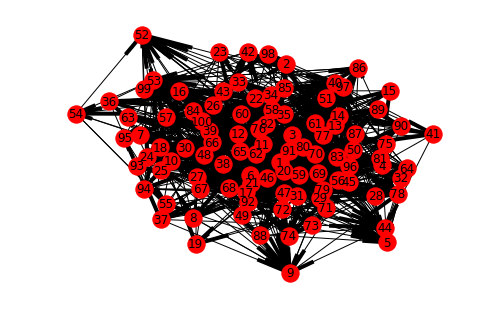

In [211]:
# Simply run this code
import warnings
warnings.filterwarnings("ignore")
plt.show()
#nx.draw(G, node_color=r,cmap=plt.cm.Reds,with_labels =False)
nx.draw(G, with_labels = True)



> <b>8) [5 points] Implement the Personalized Pagerank algorithm discussed in class. Use the iterative power method in your implementation, with teleport probability $1-\beta = 0.2$. Run the aforementioned iterative process for 100 iterations and obtain the Personalized PageRank vector $ppr$ for node 100. </b> 

In [257]:
# YOUR CODE HERE

# no need to redefine M matrix!
# initialize r0 and set beta

#Making a biased vector
r0 = np.zeros((100,1))
r0[99,0] = 1

ppr = (np.ones(100)/100).reshape(100,1)
beta = 0.8

#Power iteration method(using formula in slides)
for l in range(0,100):
    ppr = beta* np.matmul(M,ppr) + (1-beta) * r0

#print ppr


> <b>9) [3 points] What are the top 10 nodes with the largest $ppr$ scores (or proximity) to node 100? How many of these top 10 are the direct out-neighbors of node 100?</b> 


In [258]:
# YOUR CODE HERE

#Flattening for argsort operations
ppr1 = ppr.flatten()

print ("Top 10 node ID's(range from 1 to 100) with largest PPR scores to node 100\n")
top10_nids = ppr1.argsort()[-11:][::-1]
for i in range(0,11):
    pr1 = top10_nids[i]
    if(i == 1):
        print("\n")
    print ("Node ID: " + str(pr1+1) + "    Pagerank score:" + str(ppr[pr1]))
    
#Actual out-neighbours of 100th node
temp2 = ad_mat2[99,:] 
print("\n Nodes pointing into 100th node")
p =  np.nonzero(temp2) 
for i in range(0,len(p)):
    c = p[i] + 1
    print c


temp3 = ad_mat2[:,99]
print("\n Nodes pointing out from 100th node---OUT-NEIGBOURS of node 100")
q = np.nonzero(temp3)
for i in range(0,len(q)):
    d = q[i] + 1
    print d
   

Top 10 node ID's(range from 1 to 100) with largest PPR scores to node 100

Node ID: 100    Pagerank score:[ 0.21530149]


Node ID: 27    Pagerank score:[ 0.07171324]
Node ID: 14    Pagerank score:[ 0.06337565]
Node ID: 40    Pagerank score:[ 0.06030795]
Node ID: 1    Pagerank score:[ 0.05707125]
Node ID: 53    Pagerank score:[ 0.04837523]
Node ID: 66    Pagerank score:[ 0.0424653]
Node ID: 57    Pagerank score:[ 0.03869042]
Node ID: 48    Pagerank score:[ 0.03505274]
Node ID: 42    Pagerank score:[ 0.02990346]
Node ID: 96    Pagerank score:[ 0.02873026]

 Nodes pointing into 100th node
[ 6 12 21 22 31 33 57 58 60 67 72 85 87 92 99]

 Nodes pointing out from 100th node---OUT-NEIGBOURS of node 100
[ 1 14 18 27 31 40 42 57 63 71 76]


><b> Observation</b>

>We observe that 6 out of the 10 nodes listed above, are the direct out-neighbours of node 100.

>These nodes are: 1, 14, 27, 40, 42 and 57

> The other 4 nodes are not direct out-neighbours but are near to node 100 as can be observed from the network graph G.

> <b>10) [2 points] Finally, draw graph $G$ again, this time coloring the nodes by the $ppr$ values. What do you observe? Discuss briefly.</b> 

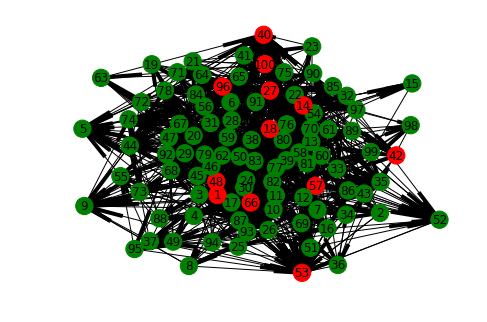

In [255]:
# YOUR CODE HERE

color_map = []
for node in G:
    indx = int(node)
    if ppr[indx - 1] > 0.027:
        color_map.append('red')
    else: color_map.append('green')      
nx.draw(G,node_color = color_map,with_labels = True)
plt.show()




><b>Method of colouring and observations</b>

>We keep the threshold of PPR as 0.027. Hence, the nodes having PPR greater than 0.027 will have red colour and those
having PPR less than 0.027 will be assigned green colour.

>We observe that the red nodes are relatively closer to the 100th node as compared to other nodes. 6 of them are direct out-neighbours as seen in previous question. 